# Modeling Pipeline Optimization With scikit-learn

Author: Mehreen Saeed

Article from [machinelearningmastery.com](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [1]:
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For metrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

# The dataset

## Read ecoli dataset from UCI ML Repository and store in dataframe

In [2]:
df = read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep='\s+',
    header=None
)
print(df.head())

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


In [3]:
print(df.shape)

(336, 9)


In [8]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])
print(X.head)
print(y.head)

<bound method NDFrame.head of         1     2     3    4     5     6     7
0    0.49  0.29  0.48  0.5  0.56  0.24  0.35
1    0.07  0.40  0.48  0.5  0.54  0.35  0.44
2    0.56  0.40  0.48  0.5  0.49  0.37  0.46
3    0.59  0.49  0.48  0.5  0.52  0.45  0.36
4    0.23  0.32  0.48  0.5  0.55  0.25  0.35
..    ...   ...   ...  ...   ...   ...   ...
331  0.74  0.56  0.48  0.5  0.47  0.68  0.30
332  0.71  0.57  0.48  0.5  0.48  0.35  0.32
333  0.61  0.60  0.48  0.5  0.44  0.39  0.38
334  0.59  0.61  0.48  0.5  0.42  0.42  0.37
335  0.74  0.74  0.48  0.5  0.31  0.53  0.52

[336 rows x 7 columns]>
<bound method NDFrame.head of       8
0    cp
1    cp
2    cp
3    cp
4    cp
..   ..
331  pp
332  pp
333  pp
334  pp
335  pp

[336 rows x 1 columns]>


## Encode the labels into unique integers

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7]


## Split the data into test and train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=1/3,
    random_state=0
)

print(X_train.shape)
print(X_test.shape)

(224, 7)
(112, 7)


# A classifier without a pipeline and optimization

In [11]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train, y_train)))
print('Test set score: ' + str(knn.score(X_test, y_test)))

Training set score: 0.9017857142857143
Test set score: 0.8482142857142857


# Setting up a machine learning pipeline

In [12]:
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('selector', VarianceThreshold()),
        ('classifier', KNeighborsClassifier())
    ]
)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier())])

In [13]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train, y_train)))
print('Test set score: ' + str(pipe.score(X_test, y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


# Optimizing and tuning the pipeline

In [14]:
parameters = {
    'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
    'selector__threshold': [0, 0.001, 0.01],
    'classifier__n_neighbors': [1, 3, 5, 7, 10],
    'classifier__p': [1, 2],
    'classifier__leaf_size': [1, 5, 10, 15]
}

In [15]:
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/1_semestre/Inteligencia_Artificial/algoritmos-ia/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Training set score: 0.8928571428571429
Test set score: 0.8571428571428571


# Analyzing the results

## Access the best set of parameters

In [16]:
best_params = grid.best_params_
print(best_params)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}


## Stores the optimum model in best_pipe

In [17]:
best_pipe = grid.best_estimator_
print(best_pipe)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7))])


## Analyzing the results from the grid.cv_results_

In [18]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


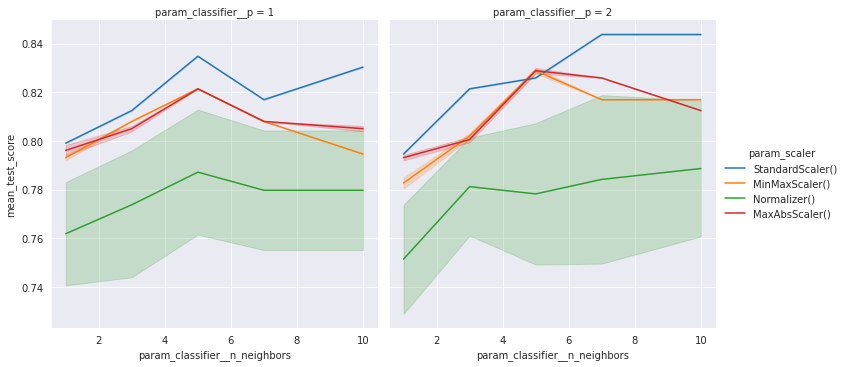

In [19]:
sns.relplot(
    data=result_df,
    kind='line',
    x='param_classifier__n_neighbors',
    y='mean_test_score',
    hue='param_scaler',
    col='param_classifier__p'
)
plt.show()

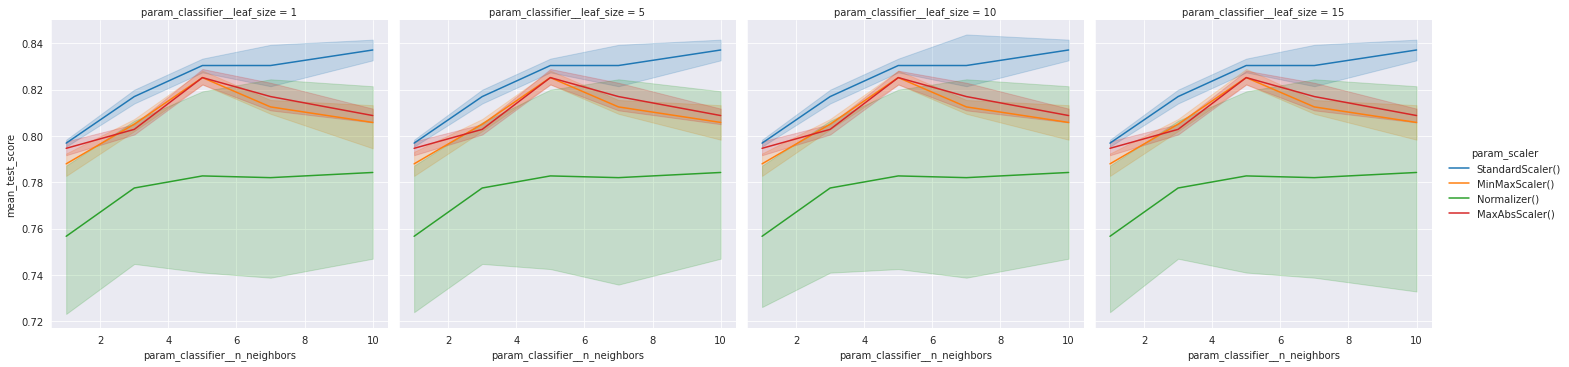

In [20]:
sns.relplot(
    data=result_df,
    kind='line',
    x='param_classifier__n_neighbors',
    y='mean_test_score',
    hue='param_scaler',
    col='param_classifier__leaf_size'
)
plt.show()